In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


link = 'crimes.csv'
#se importa el archivo modificando el tipo de datos
crimes= pd.read_csv(link, parse_dates=['Date Rptd', 'DATE OCC'], dtype={'TIME OCC':'str'})




crimes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185715 entries, 0 to 185714
Data columns (total 12 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   DR_NO         185715 non-null  int64         
 1   Date Rptd     185715 non-null  datetime64[ns]
 2   DATE OCC      185715 non-null  datetime64[ns]
 3   TIME OCC      185715 non-null  object        
 4   AREA NAME     185715 non-null  object        
 5   Crm Cd Desc   185715 non-null  object        
 6   Vict Age      185715 non-null  int64         
 7   Vict Sex      185704 non-null  object        
 8   Vict Descent  185705 non-null  object        
 9   Weapon Desc   73502 non-null   object        
 10  Status Desc   185715 non-null  object        
 11  LOCATION      185715 non-null  object        
dtypes: datetime64[ns](2), int64(2), object(8)
memory usage: 17.0+ MB


Extrayendo las horas
La hora en que se cometió cada crimen se encuentra en los dos primeros caracteres de la columna "TIME OCC".
Puedes extraer esto usando el atributo .str, indexando los dos primeros caracteres, es decir, .str[:2].
¡No olvides usar .astype(int) para cambiar el tipo de dato!
Puedes almacenar los resultados en una nueva columna, como "HOUR OCC".

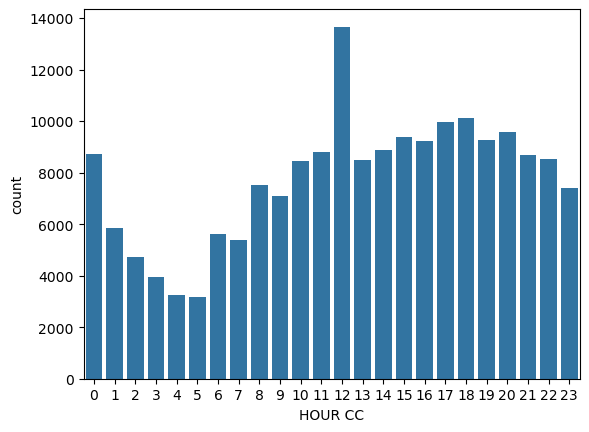

In [2]:
#Agregando una columna intera

crimes['HOUR CC'] = crimes['TIME OCC'].str[:2].astype(int)

sns.countplot(crimes, x='HOUR CC')

plt.show()

In [3]:
peak_crime_hour= 12



In [4]:
night_time = crimes[crimes['HOUR CC'].isin([22, 23,0,1,2,3])]

peak_night_crime_location=night_time.groupby('AREA NAME', as_index=False)['HOUR CC'].count().sort_values('HOUR CC', ascending=False).iloc[0]['AREA NAME']

peak_night_crime_location

'Central'

In [5]:
#Identificar el número de crímenes cometidos contra víctimas por grupo de edad (0-17, 18-25, 26-34, 35-44, 45-54, 55-64, 65+). 
#Guardar como una serie de pandas llamada victim_ages. Crear contenedores y etiquetas para los rangos de edad de las víctimas.

age_labels = [ "0-17", "18-25", "26-34", "35-44", "45-54", "55-64", "65+"]

age_bins =  [0,17,25,34,44,54,64, np.inf]

crimes['Age Bracket'] = pd.cut(crimes['Vict Age'], bins=age_bins,labels=age_labels)

victim_ages = crimes['Age Bracket'].value_counts()

print(victim_ages)

Age Bracket
26-34    47470
35-44    42157
45-54    28353
18-25    28291
55-64    20169
65+      14747
0-17      4528
Name: count, dtype: int64
